In [1]:
## import necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('darkgrid')

In [2]:
# train dataset

train_df=pd.read_csv('dataset/big-mart/Train.csv')
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
print('train dataset (raw,column):',train_df.shape)

train dataset (raw,column): (8523, 12)


In [4]:
# test dataset

test_df=pd.read_csv('dataset/big-mart/Test.csv')
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
print('test dataset (raw,column):',test_df.shape)

test dataset (raw,column): (5681, 11)


In [6]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


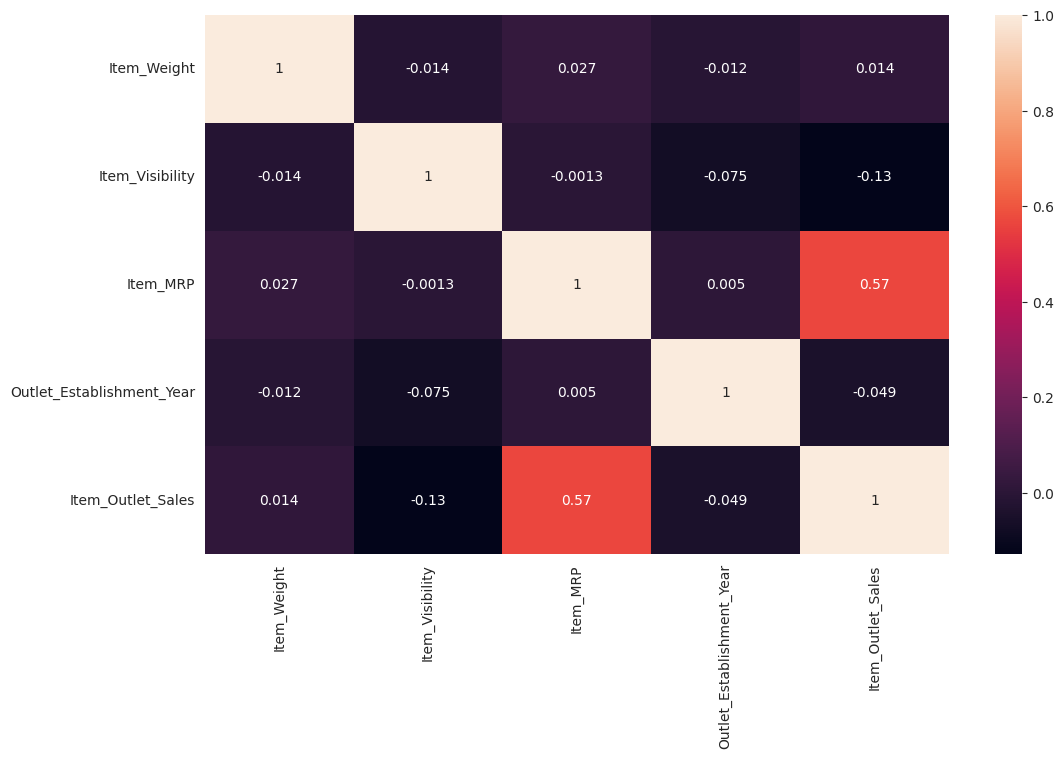

In [7]:
# correlation within features

plt.figure(figsize=(12,7))
corrMat=train_df.corr(numeric_only=True)
sns.heatmap(corrMat, annot=True)
plt.show()

# Feature engineering

In [8]:
train_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [9]:
test_df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                4705 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                4075 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


# Handling missing value

In [12]:
train_df.isnull().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
test_df.isnull().sum()

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Item_Weight

In [14]:
train_df['Item_Weight'].median()

12.6

In [15]:
test_df['Item_Weight'].median()

12.5

In [16]:
#train_df['Item_Weight']=train_df['Item_Weight'].median()

train_median=train_df['Item_Weight'].median()
test_median=test_df['Item_Weight'].median()

train_df['Item_Weight'].fillna(value=train_median,inplace=True)
test_df['Item_Weight'].fillna(value=test_median,inplace=True) #test data

## Outlet_Size 

In [17]:
train_df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
train_df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [19]:
train_df['Outlet_Size'].fillna(value=train_df['Outlet_Size'].mode()[0],inplace=True)

In [20]:
train_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
test_df['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [22]:
test_df['Outlet_Size'].fillna(value=test_df['Outlet_Size'].mode()[0],inplace=True) #test data

In [23]:
test_df.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [24]:
train_df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [25]:
train_df.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [26]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
sorted(train_df['Item_Fat_Content'].unique())

['Low Fat', 'Regular']

In [28]:
sorted(train_df['Item_Type'].unique())

['Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods']

In [29]:
sorted(train_df['Outlet_Size'].unique())

['High', 'Medium', 'Small']

In [30]:
sorted(train_df['Outlet_Location_Type'].unique())

['Tier 1', 'Tier 2', 'Tier 3']

In [31]:
sorted(train_df['Outlet_Type'].unique())

['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

In [32]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_df=train_df.apply(le.fit_transform)
test_df=test_df.apply(le.fit_transform)

In [33]:
train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,0,664,4,5592,4,1,0,1,2540
1,57,1,880,14,473,8,1,2,2,422
2,375,0,715,10,2901,4,1,0,1,1639
3,392,1,0,6,4227,3,1,2,0,670
4,265,0,0,9,627,1,0,2,1,865


In [34]:
train_df.to_csv("featured_train.csv")
test_df.to_csv("featured_test.csv")